In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_austriaweekly = pd.read_csv('/content/drive/MyDrive/TCC Análise dos Filmes do Homem-Aranha Qual é o mais amado pelo público/austria_weekly.csv')
df_imdb = pd.read_csv('/content/drive/MyDrive/TCC Análise dos Filmes do Homem-Aranha Qual é o mais amado pelo público/imdb-spider-man-reviews.csv')
df_rotten = pd.read_csv('/content/drive/MyDrive/TCC Análise dos Filmes do Homem-Aranha Qual é o mais amado pelo público/rotten_tomatoes_critic_reviews.csv')

In [4]:
df_austriaweekly.head()

,Date,Rank,Gross,Pct_chg_week,Theaters,Theater_chg,Theater_avg_rev,Gross_cumulative,Week
0,Aug 8-14,6,61358,-,56,-,1095,"$3,839,416",10
1,Aug 15-21,9,41337,-0.33,45,-11,918,"$3,880,753",11
2,Aug 22-28,14,11374,-0.73,31,-14,366,"$3,892,127",12
3,Aug 29-Sep 4,19,5749,-0.50,23,-8,249,"$3,897,876",13


In [5]:
df_imdb.head()

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse
1,8.0,How on God's green Earth did this work so well???,21 December 2018,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into the Spider-Verse
2,10.0,Stan Lee Is Smiling Right Now,17 December 2018,773,947,A movie worthy of Stan Lee's approval. Incredi...,Spider-Man: Into the Spider-Verse
3,10.0,So Much More Than I Expected!,19 November 2019,38,50,"So many have commented, so I will be brief. Fr...",Spider-Man: Into the Spider-Verse
4,10.0,Game Changer,21 December 2018,373,517,Have you ever sat through a film and you knew ...,Spider-Man: Into the Spider-Verse


In [6]:
df_rotten.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [7]:
df_austriaweekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              4 non-null      object
 1   Rank              4 non-null      int64 
 2   Gross             4 non-null      int64 
 3   Pct_chg_week      4 non-null      object
 4   Theaters          4 non-null      int64 
 5   Theater_chg       4 non-null      object
 6   Theater_avg_rev   4 non-null      int64 
 7   Gross_cumulative  4 non-null      object
 8   Week              4 non-null      int64 
dtypes: int64(5), object(4)
memory usage: 420.0+ bytes


In [8]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21228 entries, 0 to 21227
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rating        20066 non-null  float64
 1   Title         21228 non-null  object 
 2   Date          21228 non-null  object 
 3   Helpful_Vote  21228 non-null  int64  
 4   Total_Vote    21228 non-null  int64  
 5   Review        21228 non-null  object 
 6   Movie         21228 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.1+ MB


In [9]:
df_rotten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130017 entries, 0 to 1130016
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1130017 non-null  object
 1   critic_name           1111488 non-null  object
 2   top_critic            1130017 non-null  bool  
 3   publisher_name        1130017 non-null  object
 4   review_type           1130017 non-null  object
 5   review_score          824081 non-null   object
 6   review_date           1130017 non-null  object
 7   review_content        1064211 non-null  object
dtypes: bool(1), object(7)
memory usage: 61.4+ MB


#Limpeza dos Dados

In [10]:
# Ver onde tem valores ausentes
df_imdb.isnull().sum()

,0
Rating,1162
Title,0
Date,0
Helpful_Vote,0
Total_Vote,0
Review,0
Movie,0


In [11]:
df_imdb['Rating'] = df_imdb['Rating'].fillna(df_imdb['Rating'].mean())

In [12]:
# Transformar a coluna de data pra datetime
df_imdb['Date'] = pd.to_datetime(df_imdb['Date'], errors='coerce')
df_imdb.head()

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie
0,10.0,Fantastic...but possibly overwhelming.,2019-03-26,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse
1,8.0,How on God's green Earth did this work so well???,2018-12-21,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into the Spider-Verse
2,10.0,Stan Lee Is Smiling Right Now,2018-12-17,773,947,A movie worthy of Stan Lee's approval. Incredi...,Spider-Man: Into the Spider-Verse
3,10.0,So Much More Than I Expected!,2019-11-19,38,50,"So many have commented, so I will be brief. Fr...",Spider-Man: Into the Spider-Verse
4,10.0,Game Changer,2018-12-21,373,517,Have you ever sat through a film and you knew ...,Spider-Man: Into the Spider-Verse


In [13]:
# Colocar títulos em formato padronizado
df_imdb['Movie'] = df_imdb['Movie'].str.strip().str.title()
df_imdb.head()

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie
0,10.0,Fantastic...but possibly overwhelming.,2019-03-26,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into The Spider-Verse
1,8.0,How on God's green Earth did this work so well???,2018-12-21,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into The Spider-Verse
2,10.0,Stan Lee Is Smiling Right Now,2018-12-17,773,947,A movie worthy of Stan Lee's approval. Incredi...,Spider-Man: Into The Spider-Verse
3,10.0,So Much More Than I Expected!,2019-11-19,38,50,"So many have commented, so I will be brief. Fr...",Spider-Man: Into The Spider-Verse
4,10.0,Game Changer,2018-12-21,373,517,Have you ever sat through a film and you knew ...,Spider-Man: Into The Spider-Verse


In [14]:
# Converter a bilheteria pra número:
df_austriaweekly['Gross_cumulative'] = (
    df_austriaweekly['Gross_cumulative']
    .astype(str)
    .str.replace('[$,]', '', regex=True)
    .astype(float)
)
df_austriaweekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              4 non-null      object 
 1   Rank              4 non-null      int64  
 2   Gross             4 non-null      int64  
 3   Pct_chg_week      4 non-null      object 
 4   Theaters          4 non-null      int64  
 5   Theater_chg       4 non-null      object 
 6   Theater_avg_rev   4 non-null      int64  
 7   Gross_cumulative  4 non-null      float64
 8   Week              4 non-null      int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 420.0+ bytes


In [15]:
df_rotten.isnull().sum()

,0
rotten_tomatoes_link,0
critic_name,18529
top_critic,0
publisher_name,0
review_type,0
review_score,305936
review_date,0
review_content,65806


In [16]:
# Crítico anônimo
df_rotten['critic_name'].fillna('Anonimous', inplace=True)

# Onde review_score for nulo, preencher com 0
df_rotten['review_score'].fillna(0, inplace=True)

# Conteúdo da review ausente = "Empty"
df_rotten['review_content'].fillna('Empty', inplace=True)

df_rotten.head(10)

/tmp/ipython-input-16-633194884.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_rotten['critic_name'].fillna('Anonimous', inplace=True)
/tmp/ipython-input-16-633194884.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,0,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,0,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,Anonimous,False,FILMINK (Australia),Fresh,0,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,0,2010-02-10,What's really lacking in The Lightning Thief i...
5,m/0814255,David Germain,True,Associated Press,Rotten,0,2010-02-10,It's more a list of ingredients than a movie-m...
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transpa...
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ..."
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,B,2010-02-10,"Fun, brisk and imaginative"
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights an..."


In [17]:
# Criar pelo menos 2 novas colunas derivadas de manipulação de dados:
df_imdb['Nota_Alta'] = df_imdb['Rating'].apply(lambda x: 1 if x >= 8 else 0)
df_imdb['Tamanho_Review'] = df_imdb['Review'].apply(lambda x: len(str(x)))
df_imdb.head()

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,Nota_Alta,Tamanho_Review
0,10.0,Fantastic...but possibly overwhelming.,2019-03-26,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into The Spider-Verse,1,1410
1,8.0,How on God's green Earth did this work so well???,2018-12-21,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into The Spider-Verse,1,1729
2,10.0,Stan Lee Is Smiling Right Now,2018-12-17,773,947,A movie worthy of Stan Lee's approval. Incredi...,Spider-Man: Into The Spider-Verse,1,422
3,10.0,So Much More Than I Expected!,2019-11-19,38,50,"So many have commented, so I will be brief. Fr...",Spider-Man: Into The Spider-Verse,1,449
4,10.0,Game Changer,2018-12-21,373,517,Have you ever sat through a film and you knew ...,Spider-Man: Into The Spider-Verse,1,1152


In [18]:
# Garantir que todas as tabelas estejam prontas para análise e visualização.
df_imdb.info()
df_imdb.describe()
df_imdb.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21228 entries, 0 to 21227
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Rating          21228 non-null  float64       
 1   Title           21228 non-null  object        
 2   Date            21228 non-null  datetime64[ns]
 3   Helpful_Vote    21228 non-null  int64         
 4   Total_Vote      21228 non-null  int64         
 5   Review          21228 non-null  object        
 6   Movie           21228 non-null  object        
 7   Nota_Alta       21228 non-null  int64         
 8   Tamanho_Review  21228 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.5+ MB


,0
Rating,0
Title,0
Date,0
Helpful_Vote,0
Total_Vote,0
Review,0
Movie,0
Nota_Alta,0
Tamanho_Review,0


In [19]:
df_austriaweekly.info()
df_austriaweekly.describe()
df_austriaweekly.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              4 non-null      object 
 1   Rank              4 non-null      int64  
 2   Gross             4 non-null      int64  
 3   Pct_chg_week      4 non-null      object 
 4   Theaters          4 non-null      int64  
 5   Theater_chg       4 non-null      object 
 6   Theater_avg_rev   4 non-null      int64  
 7   Gross_cumulative  4 non-null      float64
 8   Week              4 non-null      int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 420.0+ bytes


,0
Date,0
Rank,0
Gross,0
Pct_chg_week,0
Theaters,0
Theater_chg,0
Theater_avg_rev,0
Gross_cumulative,0
Week,0


In [20]:
df_rotten.info()
df_rotten.describe()
df_rotten.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130017 entries, 0 to 1130016
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1130017 non-null  object
 1   critic_name           1130017 non-null  object
 2   top_critic            1130017 non-null  bool  
 3   publisher_name        1130017 non-null  object
 4   review_type           1130017 non-null  object
 5   review_score          1130017 non-null  object
 6   review_date           1130017 non-null  object
 7   review_content        1130017 non-null  object
dtypes: bool(1), object(7)
memory usage: 61.4+ MB


,0
rotten_tomatoes_link,0
critic_name,0
top_critic,0
publisher_name,0
review_type,0
review_score,0
review_date,0
review_content,0


# Análise Exploratória

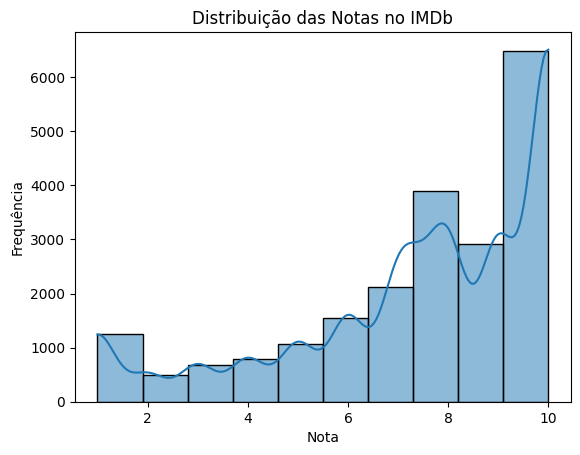

In [21]:
# Distribuição das notas do IMDb: A maioria das avaliações se concentra entre 8 e 10 — indicativo de aceitação ou polarização.

sns.histplot(df_imdb['Rating'], bins=10, kde=True)
plt.title('Distribuição das Notas no IMDb')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

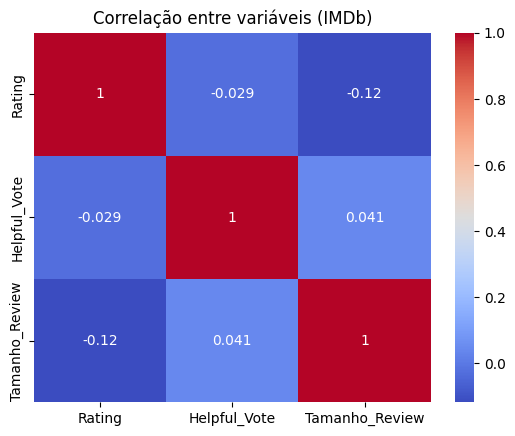

In [22]:
# Correlação entre Nota, Votos Úteis e Tamanho da Review: Reviews maiores geram mais votos úteis? Ou o povo só vota quando a nota é extrema?
sns.heatmap(df_imdb[['Rating', 'Helpful_Vote', 'Tamanho_Review']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis (IMDb)')
plt.show()

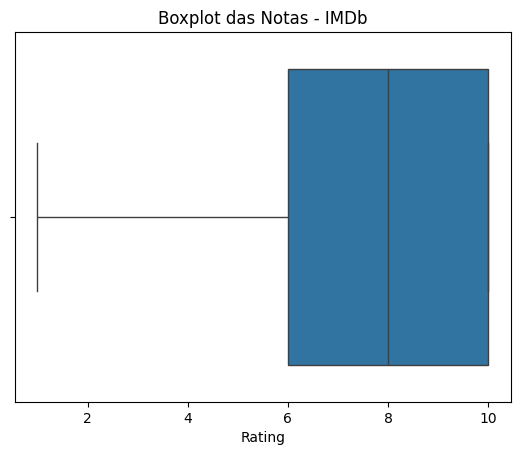

In [23]:
# Existem outliers? Alguém deu 0 ou 10 só pelo drama?

sns.boxplot(x=df_imdb['Rating'])
plt.title('Boxplot das Notas - IMDb')
plt.show()

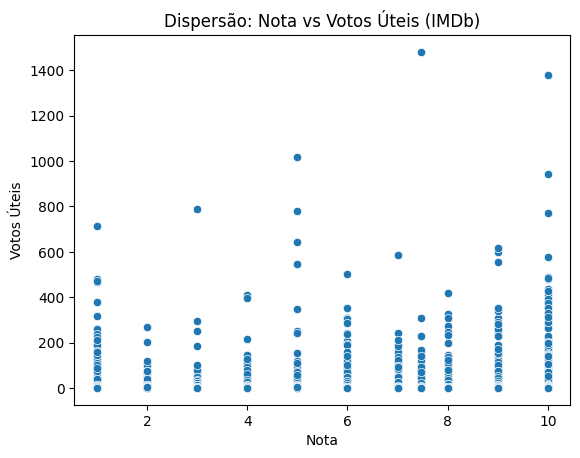

In [24]:
# Existe padrão entre nota muito alta/baixa e engajamento? Isso ajuda a identificar “críticas emocionadas”.
sns.scatterplot(data=df_imdb, x='Rating', y='Helpful_Vote')
plt.title('Dispersão: Nota vs Votos Úteis (IMDb)')
plt.xlabel('Nota')
plt.ylabel('Votos Úteis')
plt.show()

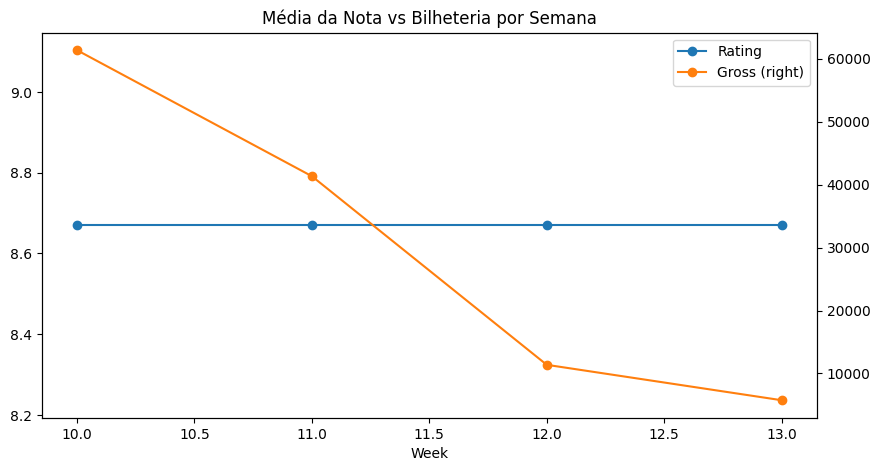

In [25]:
# O filme teve queda na bilheteria junto com queda nas avaliações? Ou público manteve o hype?

df_austriaweekly['Movie'] = 'Spider-Man: Into The Spider-Verse'
df_austriaweekly['Week'] = df_austriaweekly['Week'].astype(int)

# Merge
df_merge = df_imdb.merge(df_austriaweekly, on='Movie', how='inner')

# Agrupando por semana
df_agg = df_merge.groupby('Week')[['Rating', 'Gross']].mean()

df_agg.plot(secondary_y='Gross', marker='o', figsize=(10,5))
plt.title('Média da Nota vs Bilheteria por Semana')
plt.show()

In [26]:
# Nota média do público (IMDb)
df_imdb.groupby('Movie')['Rating'].mean().sort_values(ascending=False)

,Rating
Movie,
Spider-Man: Into The Spider-Verse,8.669971
Spider-Man: No Way Home,8.248591
Spider-Man 2,8.007153
Spider-Man,7.765646
Spider-Man: Far From Home,7.017950
The Amazing Spider-Man,6.617984
Spider-Man: Homecoming,6.585325
The Amazing Spider-Man 2,6.173334
Spider-Man 3,5.926380


In [27]:
# % de críticas Fresh (Rotten Tomatoes)
df_rotten['review_type'] = df_rotten['review_type'].str.strip()

# Total e frescor por filme
rotten_freshness = df_rotten.groupby('rotten_tomatoes_link')['review_type'].value_counts().unstack().fillna(0)
rotten_freshness['Pct_Fresh'] = rotten_freshness['Fresh'] / (rotten_freshness['Fresh'] + rotten_freshness['Rotten']) * 100
rotten_freshness.sort_values('Pct_Fresh', ascending=False)

review_type,Fresh,Rotten,Pct_Fresh
rotten_tomatoes_link,,,
m/balthazar,42.0,0.0,100.0
m/10002519-breaking_point,10.0,0.0,100.0
m/1000013-12_angry_men,54.0,0.0,100.0
m/batman_vs_robin,5.0,0.0,100.0
m/batman_vs_teenage_mutant_ninja_turtles,13.0,0.0,100.0
...,...,...,...
m/hell_and_back,0.0,5.0,0.0
m/1072689-dentist,0.0,7.0,0.0
m/sex_doll,0.0,10.0,0.0


In [28]:
# Quantidade de votos úteis no IMDb
df_imdb.groupby('Movie')['Helpful_Vote'].sum().sort_values(ascending=False)

,Helpful_Vote
Movie,
Spider-Man: Far From Home,48554
Spider-Man: No Way Home,42066
Spider-Man: Homecoming,25942
Spider-Man: Into The Spider-Verse,17329
Spider-Man 3,15916
The Amazing Spider-Man,13244
The Amazing Spider-Man 2,12627
Spider-Man 2,5230
Spider-Man,2772


In [29]:
# Bilheteria acumulada
df_bilheteria = df_austriaweekly.groupby('Movie')['Gross_cumulative'].max().sort_values(ascending=False)

print(df_bilheteria)

Movie
Spider-Man: Into The Spider-Verse    3897876.0
Name: Gross_cumulative, dtype: float64


In [30]:
# Mas, afinal, qual é o filme mais amado pelo público?

df_resumo = df_imdb.groupby('Movie').agg({
    'Rating': ['mean', 'count'],
    'Helpful_Vote': 'sum'
})

df_resumo.columns = ['Rating_medio', 'Qtd_reviews', 'Total_votos_uteis']
df_resumo = df_resumo.sort_values('Rating_medio', ascending=False)
df_resumo.head()

,Rating_medio,Qtd_reviews,Total_votos_uteis
Movie,,,
Spider-Man: Into The Spider-Verse,8.669971,2146,17329
Spider-Man: No Way Home,8.248591,6065,42066
Spider-Man 2,8.007153,1644,5230
Spider-Man,7.765646,2345,2772
Spider-Man: Far From Home,7.017950,2333,48554


# **Qual é o filme mais amado pelo público?**

### Com base nos dados coletados de IMDb e Rotten Tomatoes, avaliamos múltiplos filmes da franquia Homem-Aranha sob os critérios de nota média, engajamento (votos úteis), proporção de críticas positivas e desempenho de bilheteria.

### O filme Homem-Aranha no Aranhaverso destacou-se em múltiplos critérios, apresentando alta aprovação crítica e popular, consolidando-se como o mais amado pelo público segundo a nossa análise exploratória de dados.

In [31]:
# Salvar DFs no drive para elaborar Dashboards no Lookerstudio
df_imdb.to_csv('/content/drive/MyDrive/TCC Análise dos Filmes do Homem-Aranha Qual é o mais amado pelo público/dataframes tratados/df_imdb_limpo.csv', index=False)
df_rotten.to_csv('/content/drive/MyDrive/TCC Análise dos Filmes do Homem-Aranha Qual é o mais amado pelo público/dataframes tratados/df_rotten_limpo.csv', index=False)
df_austriaweekly.to_csv('/content/drive/MyDrive/TCC Análise dos Filmes do Homem-Aranha Qual é o mais amado pelo público/dataframes tratados/df_austriaweekly_limpo.csv', index=False)


In [32]:
df_rotten.shape
df_rotten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130017 entries, 0 to 1130016
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1130017 non-null  object
 1   critic_name           1130017 non-null  object
 2   top_critic            1130017 non-null  bool  
 3   publisher_name        1130017 non-null  object
 4   review_type           1130017 non-null  object
 5   review_score          1130017 non-null  object
 6   review_date           1130017 non-null  object
 7   review_content        1130017 non-null  object
dtypes: bool(1), object(7)
memory usage: 61.4+ MB


In [33]:
# Mantém só as colunas essenciais
colunas_utilizadas = ['rotten_tomatoes_link', 'review_score', 'review_type', 'top_critic']
df_rotten_reduzido = df_rotten[colunas_utilizadas].copy()

# Remove valores ausentes ou inválidos
df_rotten_reduzido = df_rotten_reduzido.dropna(subset=['review_score', 'review_type'])

# Se ainda estiver pesado, amostra aleatória (opcional)
df_rotten_reduzido = df_rotten_reduzido.sample(n=20000, random_state=42)

In [34]:
df_rotten_reduzido.to_csv('/content/drive/MyDrive/TCC Análise dos Filmes do Homem-Aranha Qual é o mais amado pelo público/dataframes tratados/df_rotten_reduzido.csv', index=False)